In [4]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired) # 色設定

In [5]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, type='predict'):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    elif type == 'probability':
        Z = np.exp(clf.predict_log_proba(np.c_[XX.ravel(), YY.ravel()]))[:, 1]
    else:
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not
        else:
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()

    if boundary:
        level = [0]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [6]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=8)  # このrandom_stateは sgd・adamをするときのシャフルのランダム性を指定している？

clf.alpha = 1
clf.max_iter = 2000
# max_iter = 200 だとConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
# と言われてしまい，まだ収束してない．
clf.hidden_layer_sizes=(10,) # The ith element represents the number of neurons in the ith hidden layer.

clf

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=8, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

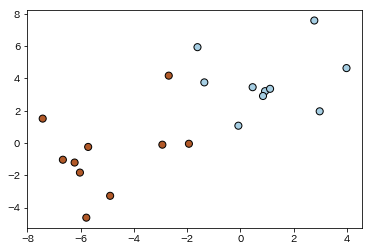

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

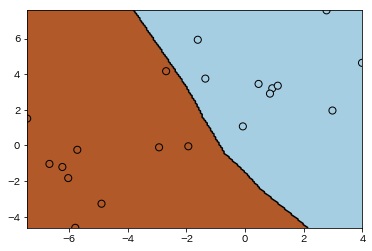

In [8]:
clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf)

In [9]:
print('出力層の数', clf.n_outputs_) # ２クラス問題なので出力層の数は1つ
print('層の数', clf.n_layers_) # 層の数．（出力層，入力層も含む）

出力層の数 1
層の数 3


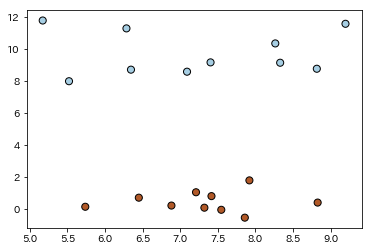

In [10]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=8   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

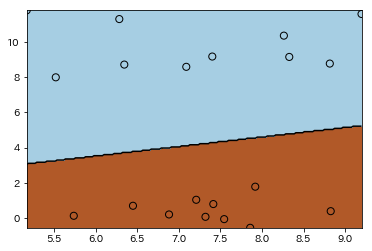

In [11]:
clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

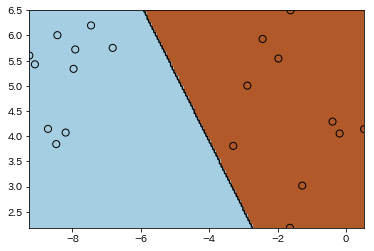

In [12]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=7   # 乱数種（再現用）
                 )
clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

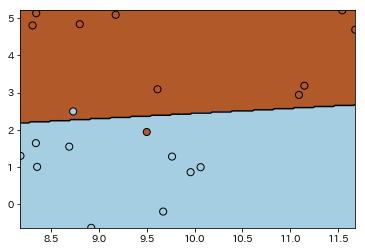

In [13]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=4   # 乱数種（再現用）
                 )
clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

今のパラメータだとうまく分けられない．

今の活性化関数はreluを使っている．詳しくは以下参照． 青がrelu
https://ja.wikipedia.org/wiki/%E6%B4%BB%E6%80%A7%E5%8C%96%E9%96%A2%E6%95%B0#ReLU.EF.BC.88.E3.83.A9.E3.83.B3.E3.83.97.E9.96.A2.E6.95.B0.EF.BC.89
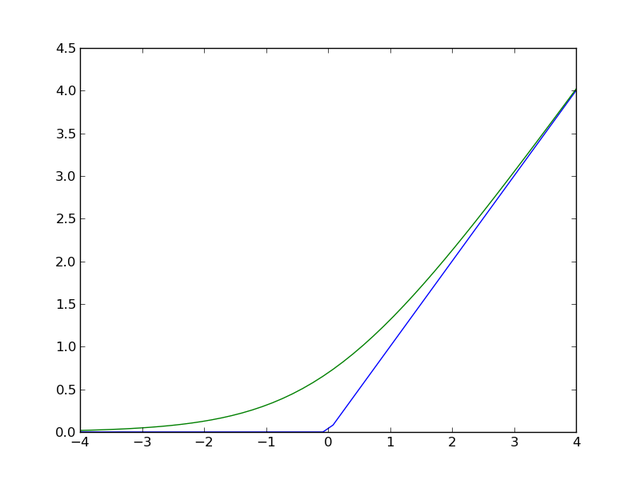

In [14]:
# modified from https://gist.github.com/craffel/2d727968c3aaebd10359

def draw_neural_net(layer_sizes, left=.1, right=.9, bottom=.1, top=.9, size=5):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    fig = plt.figure(figsize=(size, size))
    ax = fig.gca()
    ax.axis('off')

    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)



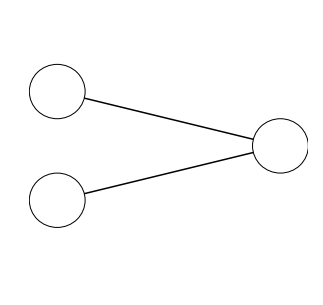

In [15]:
draw_neural_net([2, 1])

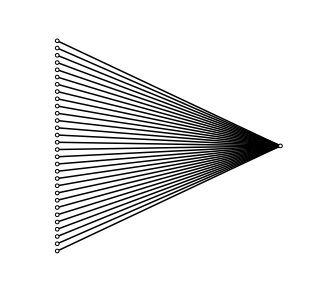

In [16]:
draw_neural_net([30, 1])

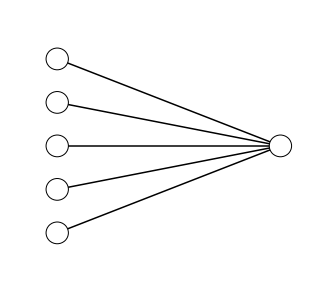

In [17]:
draw_neural_net([5, 1])

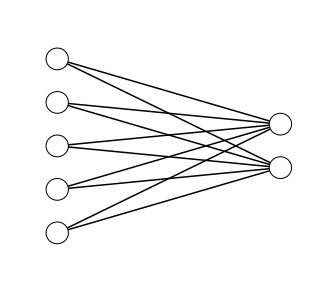

In [18]:
draw_neural_net([5, 2])

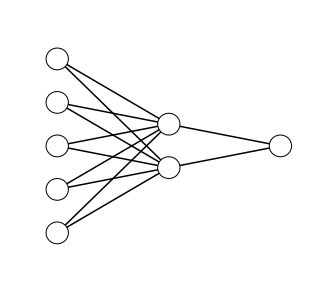

In [19]:
draw_neural_net([5, 2, 1])

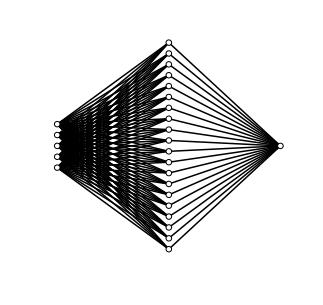

In [20]:
draw_neural_net([5, 20, 1])
# 普通は隠れ層を入力層よりも増やす．つまりSVMでいうカーネル関数を使う（特徴を非線形変換する）ことに相当している．　よって識別面も非線形にすることができる．

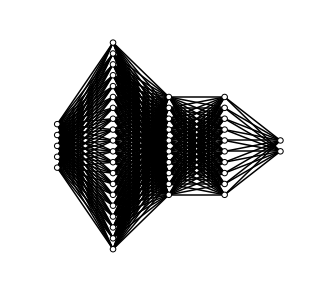

In [21]:
draw_neural_net([5, 20, 10, 10, 2])

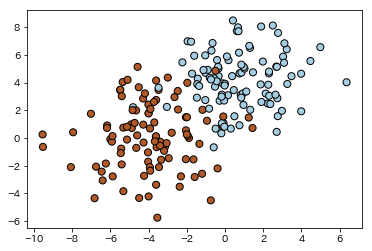

In [22]:
X, y = make_blobs(n_samples=200, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

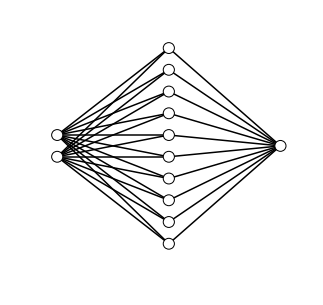

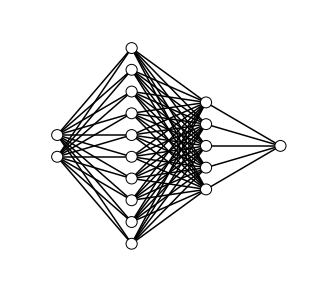

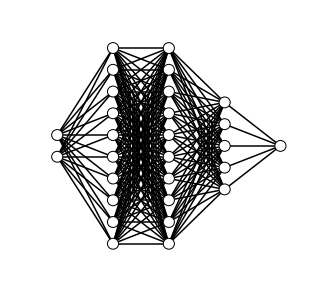

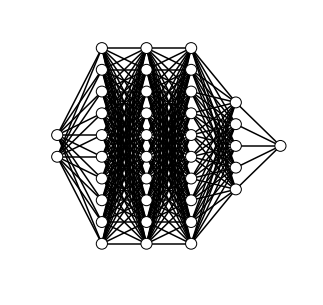

In [23]:
draw_neural_net([2, 10, 1], size=5)
draw_neural_net([2, 10, 5, 1], size=5)
draw_neural_net([2, 10, 10, 5, 1], size=5)
draw_neural_net([2, 10, 10, 10, 5, 1], size=5)

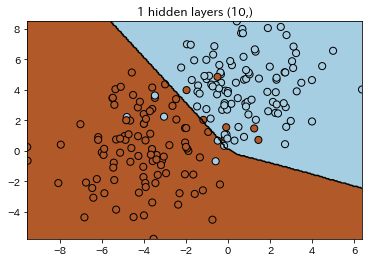

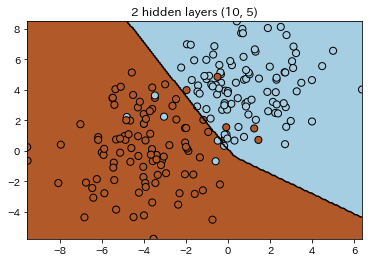

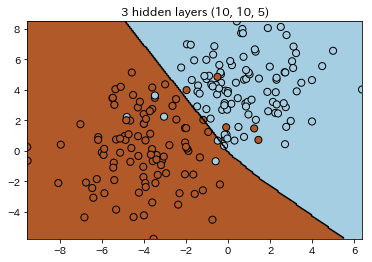

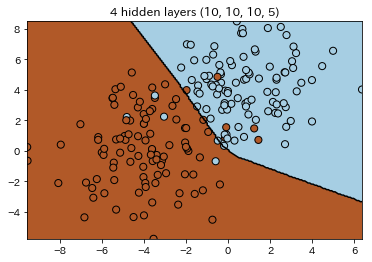

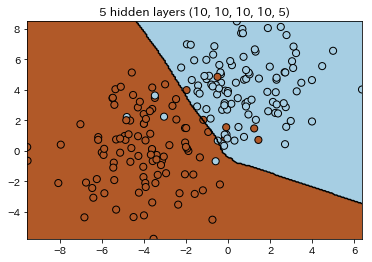

In [24]:
clf.random_state = 10

for layers in [(10,),
               (10, 5),
               (10, 10, 5),
               (10, 10, 10, 5),
               (10, 10, 10, 10, 5)]:

    clf.hidden_layer_sizes = layers
    
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plotBoundary(X, clf)
    plt.title("{0} hidden layers {1}".format(len(layers), layers))
    plt.show()

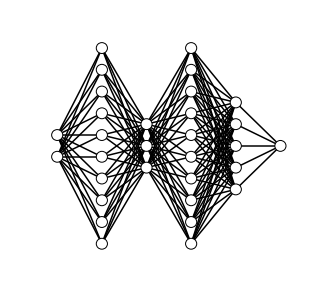

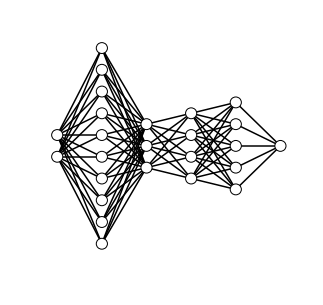

In [25]:
draw_neural_net([2, 10, 3, 10, 5, 1], size=5)
draw_neural_net([2, 10, 3, 4, 5, 1], size=5)

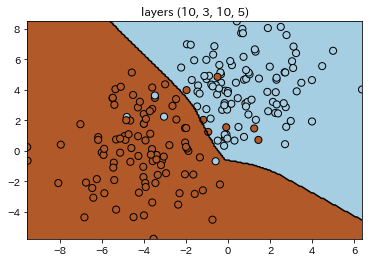

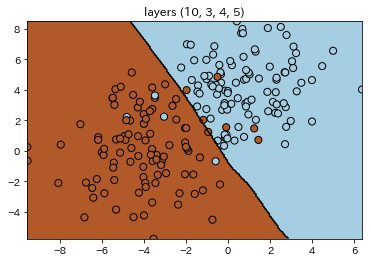

In [26]:
clf.random_state = 10

for layers in [(10,3,10,5),
               (10,3,4,5)]:
    clf.set_params(hidden_layer_sizes=layers, random_state=8).fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plotBoundary(X, clf)
    plt.title("layers {0}".format(layers))
    plt.show()

In [27]:
clf.get_params()

{'activation': 'relu',
 'alpha': 1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10, 3, 4, 5),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 2000,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 8,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

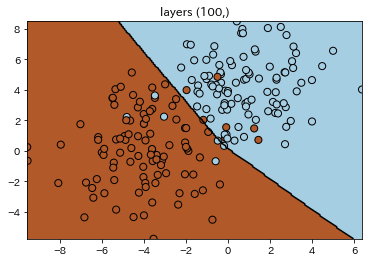

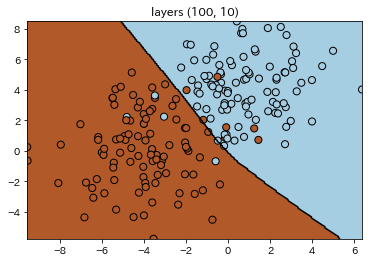

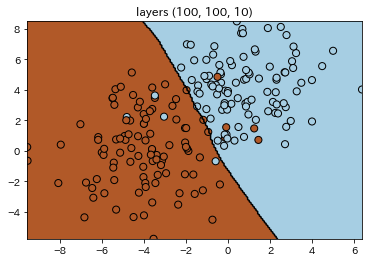

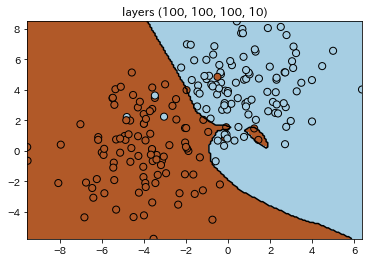

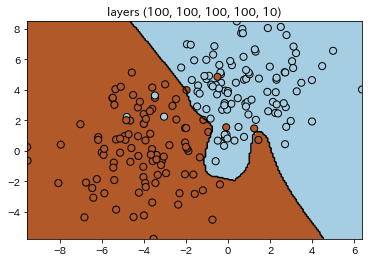

In [28]:
clf.random_state = 10

for layers in [(100,),
               (100,10),
               (100,100,10),
               (100,100,100,10),
               (100,100,100,100,10)]:
    clf.hidden_layer_sizes=layers
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plotBoundary(X, clf)
    plt.title("layers {0}".format(layers))
    plt.show()

In [29]:
clf

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 10),
       learning_rate='constant', learning_rate_init=0.001, max_iter=2000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=10,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

様々なパラメータがあり，またランダム性があるので，もっとも良いパラメータを見つけるにはかなり困難

In [30]:
# ガンデータに対してやってみる．
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
ss = StratifiedShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
print(np.unique(y_train, return_counts=True)[1] / y_train.size)
print(np.unique(y_test, return_counts=True)[1] / y_test.size)

[ 0.37362637  0.62637363]
[ 0.36842105  0.63157895]


In [32]:
# デフォルトでやってみる.
clf = MLPClassifier()

In [33]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.63157894736842102

In [34]:
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [35]:
# 隠れ層を色々変えてやってみる．
for layers in [(100,),
               (100,10),
               (100,100,10),
               (100,100,100,10),
               (100,100,100,100,10),
               (100,100,100,100,100,10)]:
    
    clf.set_params(hidden_layer_sizes=layers).fit(X_train, y_train) # ランドm性があるので結果は変わる．
    print("{0} hidden layers".format(len(layers)), clf.score(X_test, y_test))

1 hidden layers 0.921052631579
2 hidden layers 0.894736842105
3 hidden layers 0.631578947368
4 hidden layers 0.885964912281
5 hidden layers 0.921052631579
6 hidden layers 0.921052631579


In [36]:
# スケーリングしてみる
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale  = scaler.transform(X_test)

In [37]:
clf = MLPClassifier()

In [38]:
clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

0.95614035087719296

In [39]:
clf.alpha = 1 # L2 penalty (regularization term) parameter.
clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

0.94736842105263153

In [40]:
for layers in [(100,),
               (100,10),
               (100,100,10),
               (100,100,100,10),
               (100,100,100,100,10),
               (100,100,100,100,100,10)]:
    clf.hidden_layer_sizes = layers
    clf.fit(X_train_scale, y_train)
    print("{0} hidden layers".format(len(layers)), clf.score(X_test_scale, y_test))

1 hidden layers 0.947368421053
2 hidden layers 0.956140350877
3 hidden layers 0.973684210526
4 hidden layers 0.982456140351
5 hidden layers 0.964912280702
6 hidden layers 0.973684210526


/Users/yohei/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 1 nodes 0.368421052632
1 hidden layer with 2 nodes 0.877192982456
1 hidden layer with 3 nodes 0.824561403509
1 hidden layer with 4 nodes 0.929824561404
1 hidden layer with 5 nodes 0.929824561404
1 hidden layer with 6 nodes 0.947368421053
1 hidden layer with 7 nodes 0.859649122807
1 hidden layer with 8 nodes 0.929824561404
1 hidden layer with 9 nodes 0.938596491228
1 hidden layer with 10 nodes 0.947368421053
1 hidden layer with 11 nodes 0.938596491228
1 hidden layer with 12 nodes 0.938596491228
1 hidden layer with 13 nodes 0.947368421053
1 hidden layer with 14 nodes 0.929824561404
1 hidden layer with 15 nodes 0.947368421053
1 hidden layer with 16 nodes 0.938596491228
1 hidden layer with 17 nodes 0.938596491228
1 hidden layer with 18 nodes 0.947368421053
1 hidden layer with 19 nodes 0.947368421053


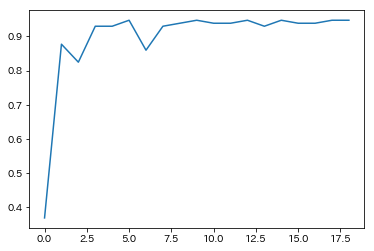

In [45]:
# 今度は隠れ層一つに対してノードの数を変えてみる．
scores = []
for nodes in range(1, 20):

    clf.hidden_layer_sizes = (nodes,)
    
    clf.fit(X_train_scale, y_train)
    score = clf.score(X_test_scale, y_test)
    print("1 hidden layer with {0} nodes".format(nodes), score)
    scores.append( score )

socres = np.array(scores)
plt.plot(scores)

In [46]:
clf.coefs_

[array([[  7.94590535e-02,   8.23037405e-02,  -4.93497796e-03,
          -2.31060164e-02,  -1.61002944e-02,  -3.31402781e-02,
          -1.23767196e-01,   1.88676221e-01,  -7.21584426e-04,
          -3.04718371e-02,   5.20206653e-02,   3.41652481e-04,
          -4.30864199e-02,  -4.61567673e-02,   2.81406359e-01,
           3.58918859e-01,  -1.15718512e-02,  -5.55263890e-02,
           1.01070601e-02],
        [ -1.56615903e-01,  -3.35637876e-02,  -1.00780574e-02,
           5.30737950e-02,  -1.87547452e-02,  -7.06170961e-02,
          -2.90244868e-01,   1.13744182e-01,  -3.18664451e-02,
          -1.15678553e-03,   1.62289734e-01,   3.59809405e-04,
           1.50287219e-02,  -7.00201919e-02,   1.93735296e-01,
           1.30525053e-01,  -2.21953672e-02,   1.56303577e-02,
          -4.24829895e-02],
        [ -5.98117710e-02,   2.12470526e-03,  -1.04365664e-01,
           1.41631603e-01,  -1.58618411e-02,  -4.58455675e-02,
          -5.41965720e-02,   2.20273429e-01,   3.10561671e-02,